In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [70]:
import csv

def convert_to_csv(input_file, output_file):
    with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
        reader = csv.reader(infile, delimiter=';')
        writer = csv.writer(outfile)
        headers = next(reader)
        writer.writerow(headers)
        for row in reader:
            writer.writerow([float(value) for value in row])

input_file_white = "winequality-white.csv"
output_file_white = "wine_data_white.csv"
input_file_red = "winequality-red.csv"
output_file_red = "wine_data_red.csv"

convert_to_csv(input_file_white, output_file_white)
convert_to_csv(input_file_red, output_file_red)



In [71]:
red_wine = pd.read_csv("wine_data_red.csv")
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [72]:
white_wine = pd.read_csv("wine_data_white.csv")
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8      6.0  
1      9.5      6.0  
2     10.1      6.0  
3      9.9      6.0  
4      9.9      6.0

# Pre-Processing the data and Exploratory Data Analysis

In [73]:
red_wine.shape

(1599, 12)

In [74]:
white_wine.shape

(4898, 12)

In [75]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [76]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [77]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [79]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [80]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

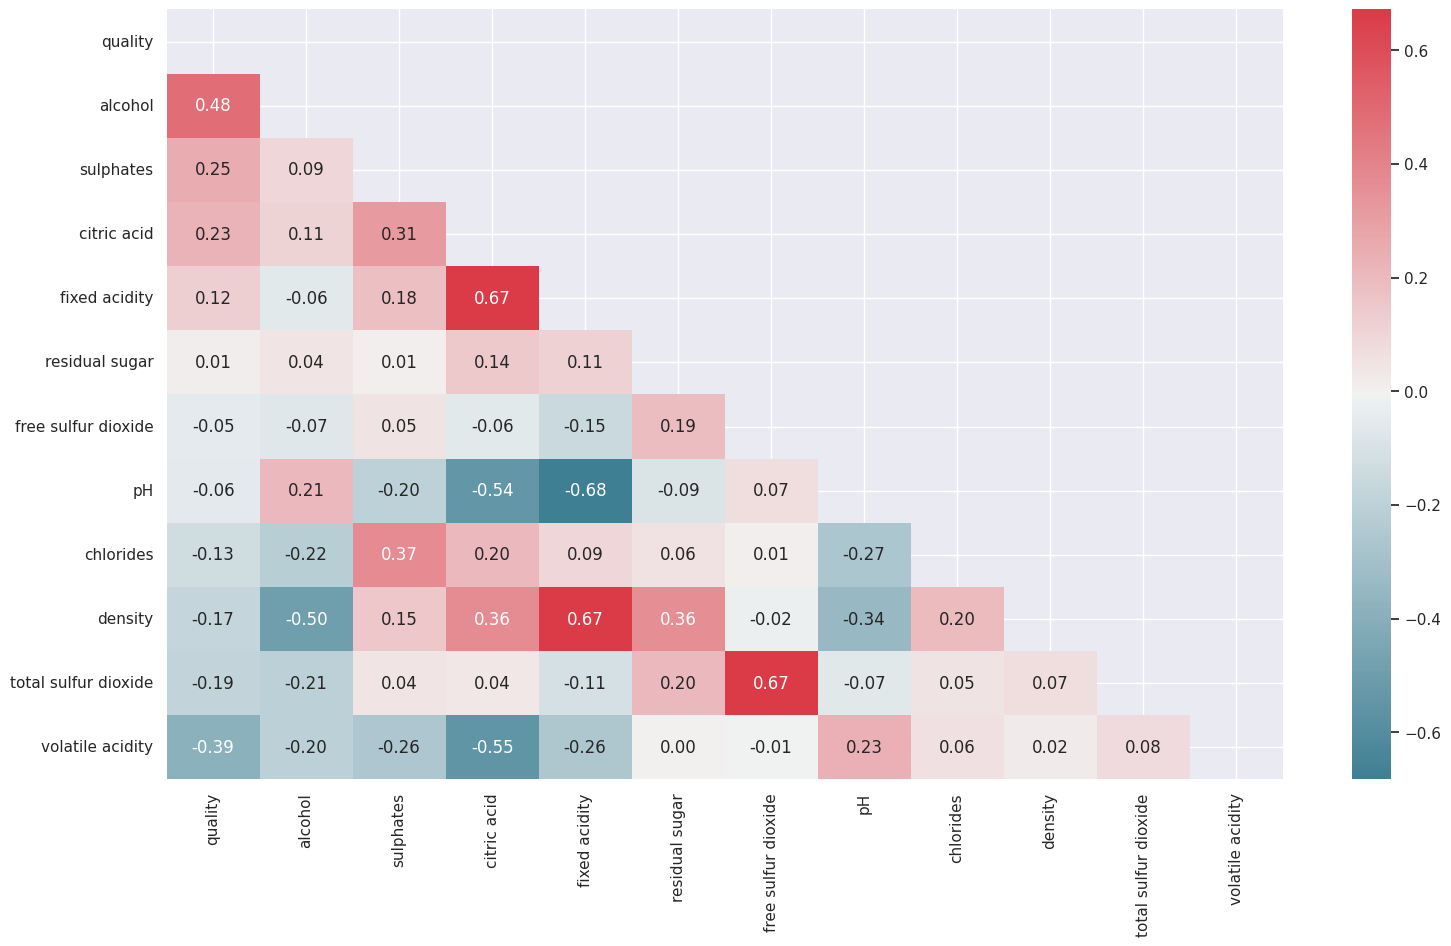

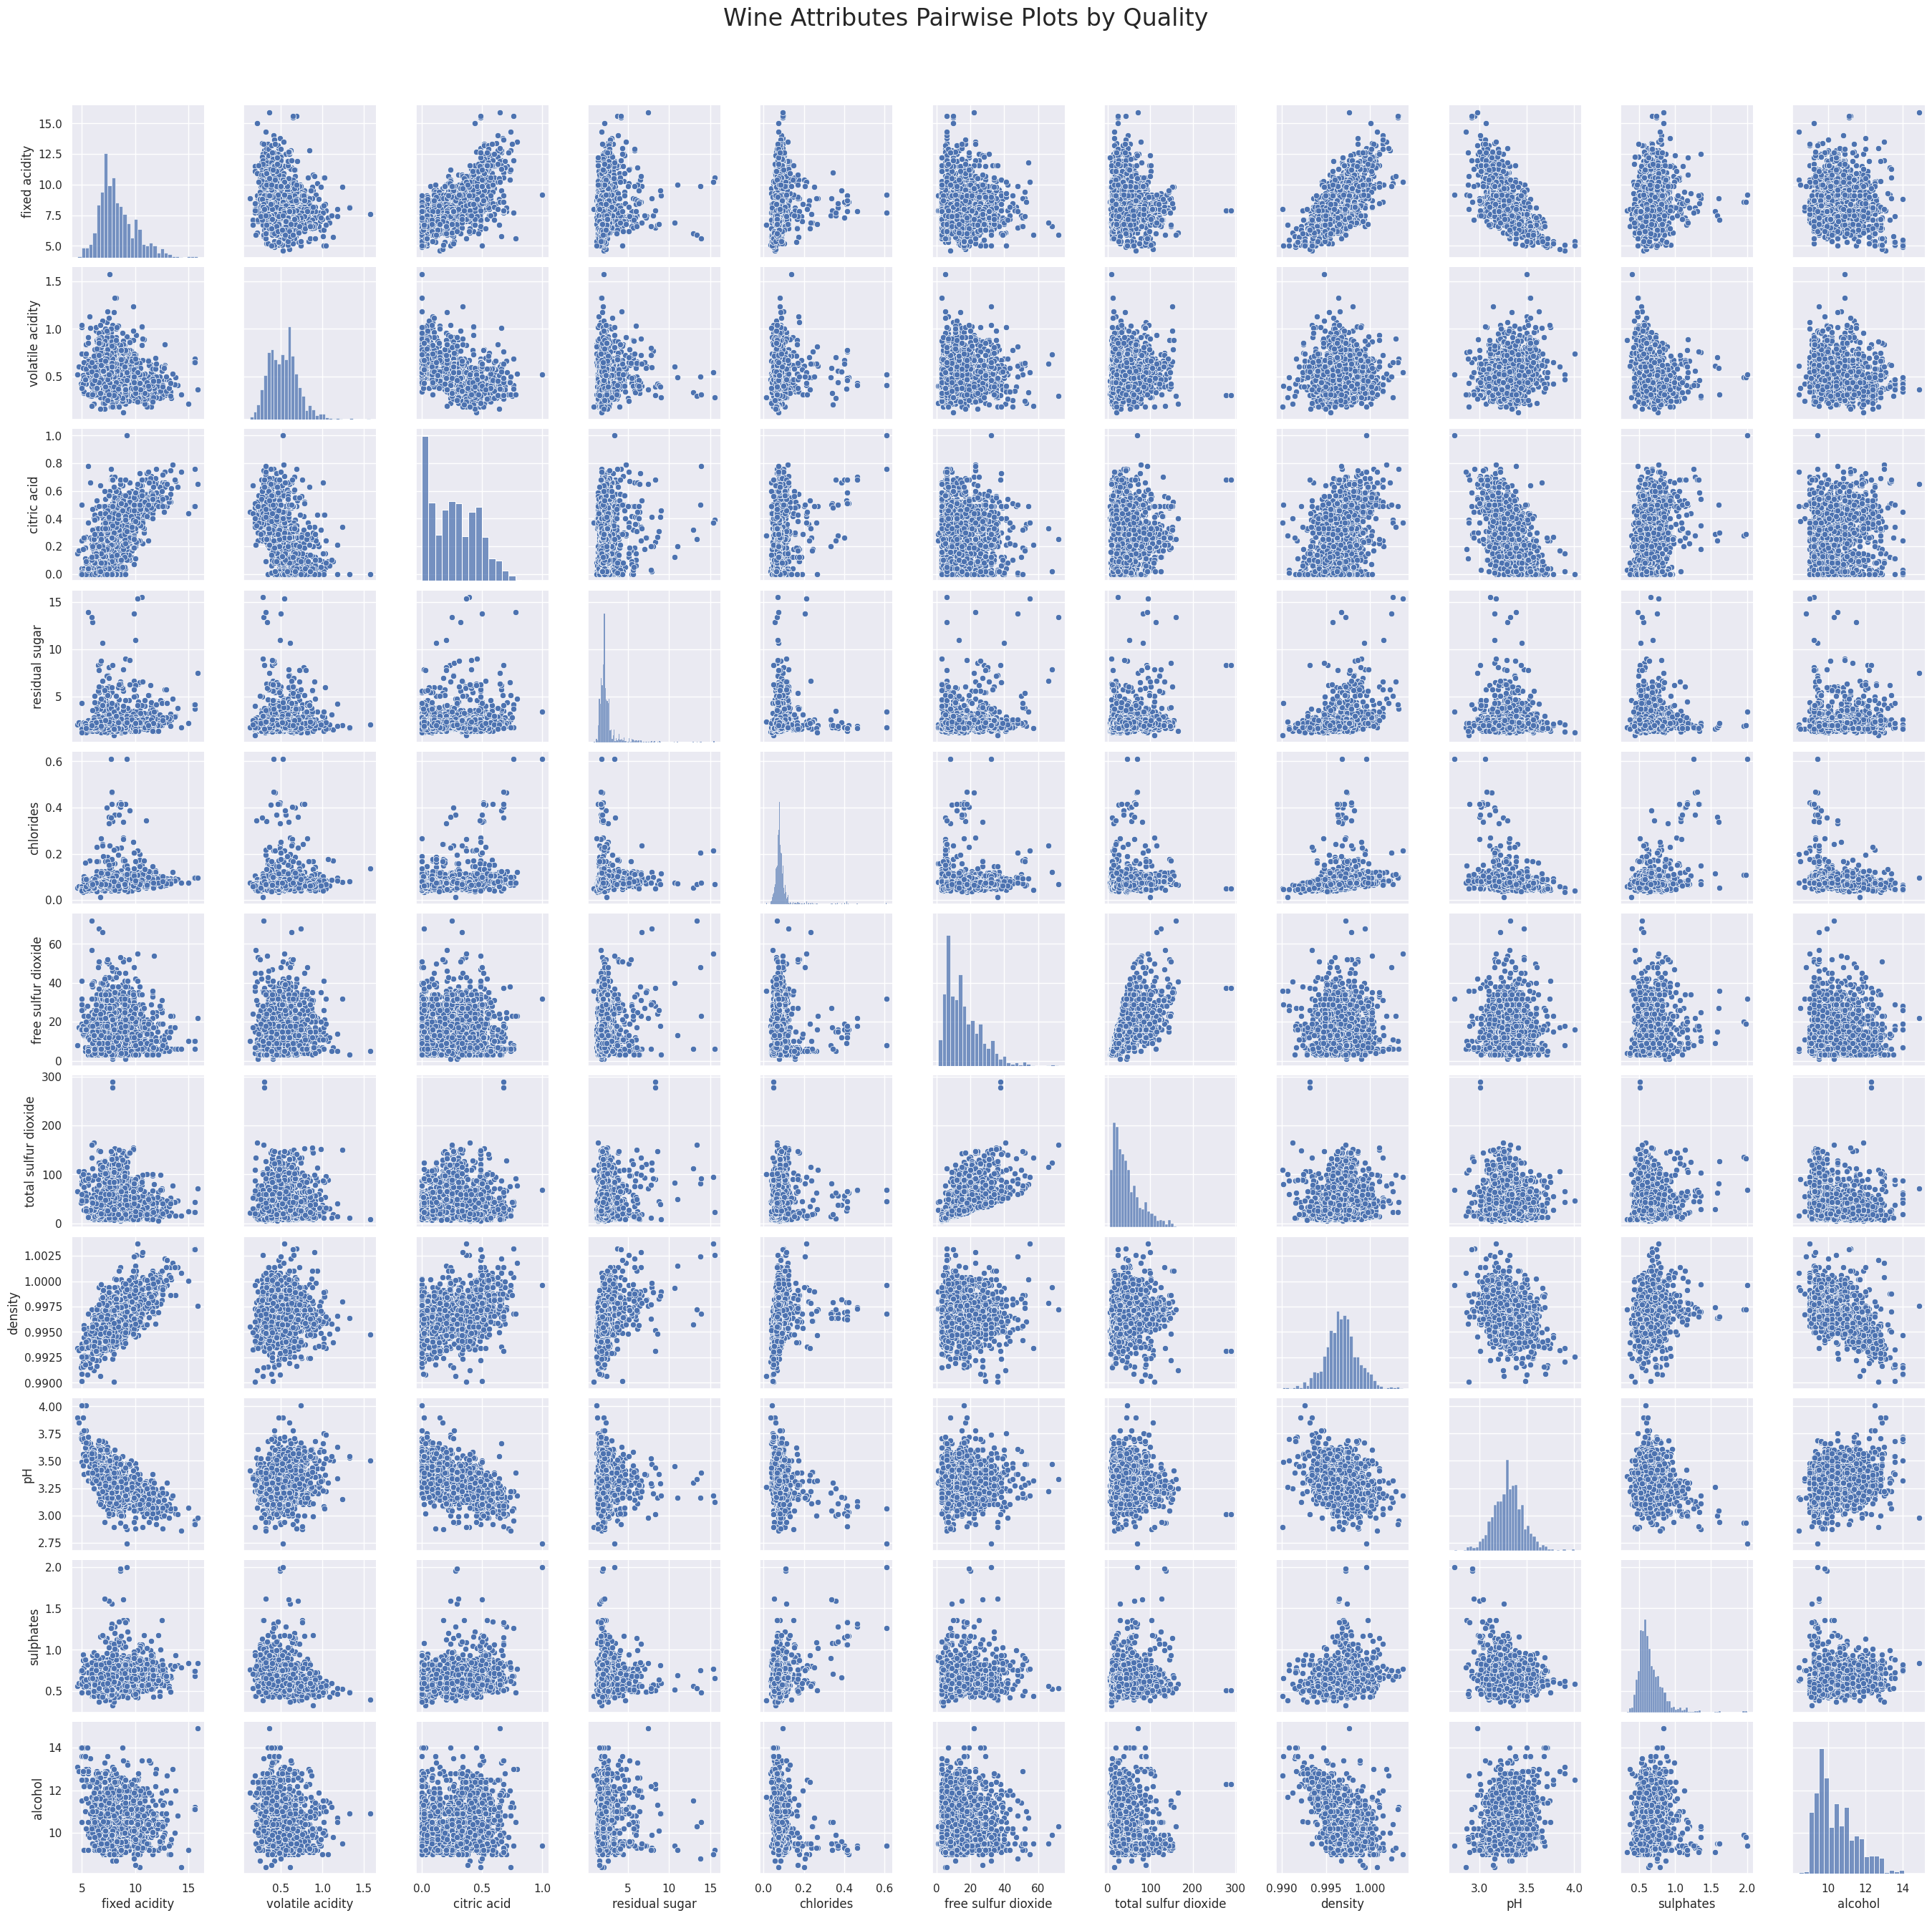

In [81]:
corr = red_wine.corr()
top_corr_cols = corr.quality.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)

sns.set(font_scale=1.0)
cols = red_wine.columns
cols = cols.drop('quality')
g = sns.pairplot(data = red_wine.loc[:, cols])
fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

plt.show()

del corr, dropSelf, top_corr, g, fig, t

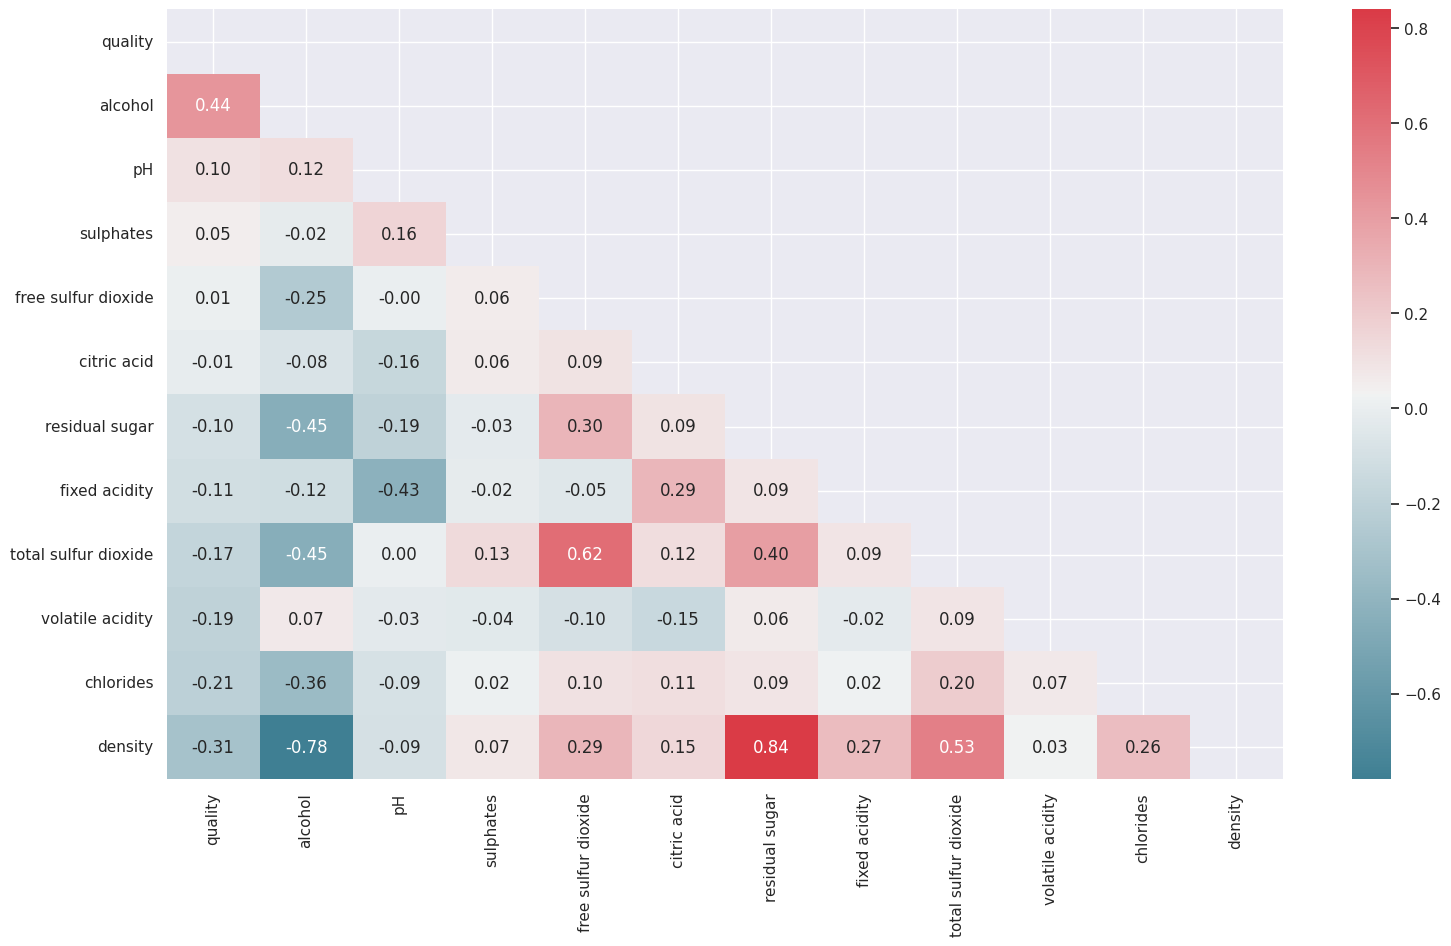

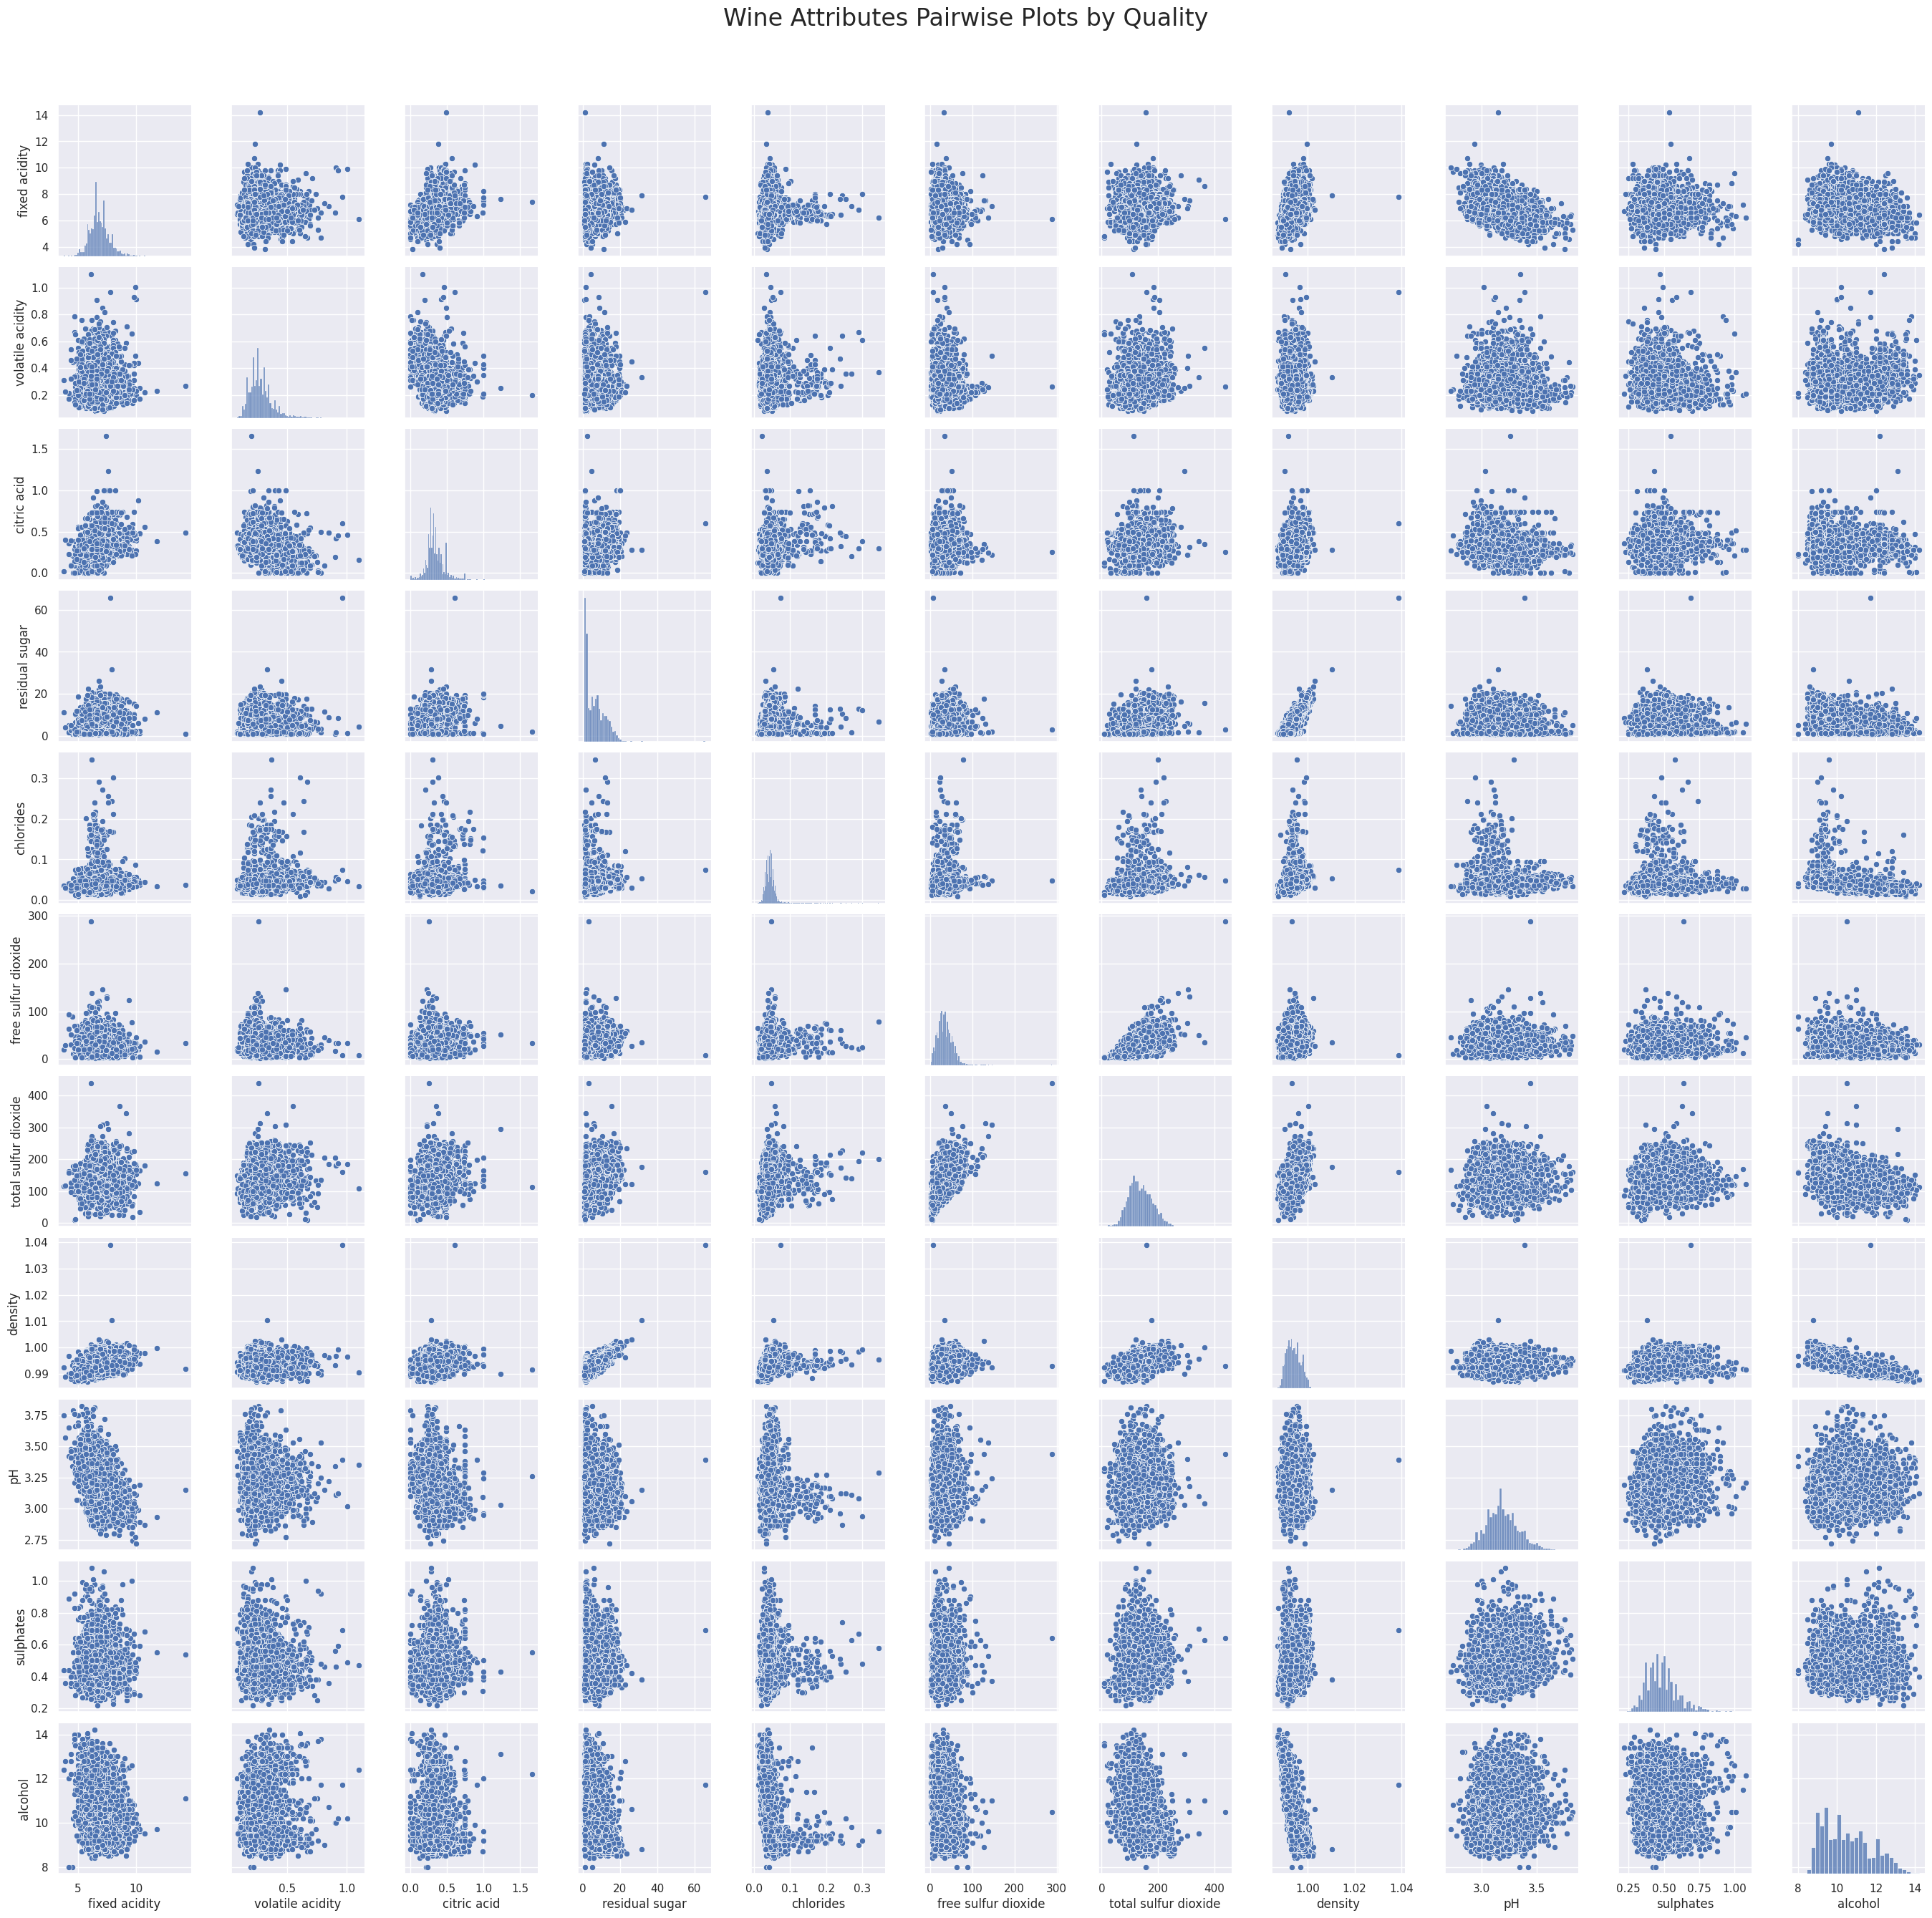

In [82]:
corr = white_wine.corr()
top_corr_cols = corr.quality.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)

sns.set(font_scale=1.0)
cols = white_wine.columns
cols = cols.drop('quality')
g = sns.pairplot(data = white_wine.loc[:, cols])
fig = g.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

plt.show()

del corr, dropSelf, top_corr, g, fig, t

# Dimensionality reduction techniques

## Prediction model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

scaler = StandardScaler()
white_wine_features = scaler.fit_transform(white_wine.drop(columns=['quality']))
red_wine_features = scaler.fit_transform(red_wine.drop(columns=['quality']))
white_wine_targets = white_wine['quality']
red_wine_targets = red_wine['quality']

white_train_features, white_test_features, white_train_targets, white_test_targets = train_test_split(white_wine_features, white_wine_targets, test_size=0.3, random_state=42)
red_train_features, red_test_features, red_train_targets, red_test_targets = train_test_split(red_wine_features, red_wine_targets, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

white_train_features_pca = pca.fit_transform(white_train_features)
white_train_features_lda = lda.fit_transform(white_train_features, white_train_targets)

red_train_features_pca = pca.fit_transform(red_train_features)
red_train_features_lda = lda.fit_transform(red_train_features, red_train_targets)

logistic_reg = LogisticRegression(max_iter=1000)

logistic_reg.fit(white_train_features, white_train_targets)

logistic_reg.fit(white_train_features_pca, white_train_targets)

logistic_reg.fit(white_train_features_lda, white_train_targets)

logistic_reg_original = LogisticRegression(max_iter=1000)
logistic_reg_original.fit(white_train_features, white_train_targets)

logistic_reg_pca = LogisticRegression(max_iter=1000)
logistic_reg_pca.fit(white_train_features_pca, white_train_targets)

logistic_reg_lda = LogisticRegression(max_iter=1000)
logistic_reg_lda.fit(white_train_features_lda, white_train_targets)

white_test_predictions_original = logistic_reg_original.predict(white_test_features)
accuracy_original_white = accuracy_score(white_test_targets, white_test_predictions_original)

white_test_predictions_pca = logistic_reg_pca.predict(pca.transform(white_test_features))
accuracy_pca_white = accuracy_score(white_test_targets, white_test_predictions_pca)

white_test_predictions_lda = logistic_reg_lda.predict(lda.transform(white_test_features))
accuracy_lda_white = accuracy_score(white_test_targets, white_test_predictions_lda)

print("For white wine:\n")
print("Accuracy (Original):", accuracy_original_white)
print("Accuracy (PCA):", accuracy_pca_white)
print("Accuracy (LDA):", accuracy_lda_white)

red_test_predictions_original = logistic_reg_original.predict(red_test_features)
accuracy_original_red = accuracy_score(red_test_targets, red_test_predictions_original)

red_test_predictions_pca = logistic_reg_pca.predict(pca.transform(red_test_features))
accuracy_pca_red = accuracy_score(red_test_targets, red_test_predictions_pca)

red_test_predictions_lda = logistic_reg_lda.predict(lda.transform(red_test_features))
accuracy_lda_red = accuracy_score(red_test_targets, red_test_predictions_lda)

print("\nFor red wine:\n")
print("Accuracy (Original):", accuracy_original_red)
print("Accuracy (PCA):", accuracy_pca_red)
print("Accuracy (LDA):", accuracy_lda_red)

For white wine:

Accuracy (Original): 0.5401360544217687
Accuracy (PCA): 0.454421768707483
Accuracy (LDA): 0.32789115646258504

For red wine:

Accuracy (Original): 0.46875
Accuracy (PCA): 0.40208333333333335
Accuracy (LDA): 0.3


## Classification model

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

red_wine = pd.read_csv("winequality-red.csv", delimiter=';')
white_wine = pd.read_csv("winequality-white.csv", delimiter=';')

red_wine['class'] = 'red'
white_wine['class'] = 'white'

combined_data = pd.concat([red_wine, white_wine], ignore_index=True)

scaler = StandardScaler()
features = combined_data.drop(columns=['class'])
scaled_features = scaler.fit_transform(features)
combined_data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
combined_data_scaled['class'] = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(combined_data_scaled.drop(columns=['class']), combined_data_scaled['class'], test_size=0.3, random_state=42)

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=min(X_train.shape[1], len(set(y_train)) - 1))  # Adjusting n_components here

X_train_pca = pca.fit_transform(X_train)
X_train_lda = lda.fit_transform(X_train, y_train)

logistic_reg_original = LogisticRegression(max_iter=1000)
logistic_reg_pca = LogisticRegression(max_iter=1000)
logistic_reg_lda = LogisticRegression(max_iter=1000)

logistic_reg_original.fit(X_train, y_train)

logistic_reg_pca.fit(X_train_pca, y_train)

logistic_reg_lda.fit(X_train_lda, y_train)

X_test_pca = pca.transform(X_test)
X_test_lda = lda.transform(X_test)

accuracy_original = accuracy_score(y_test, logistic_reg_original.predict(X_test))
accuracy_pca = accuracy_score(y_test, logistic_reg_pca.predict(X_test_pca))
accuracy_lda = accuracy_score(y_test, logistic_reg_lda.predict(X_test_lda))

print("Accuracy (Original):", accuracy_original)
print("Accuracy (PCA):", accuracy_pca)
print("Accuracy (LDA):", accuracy_lda)


Accuracy (Original): 0.9892307692307692
Accuracy (PCA): 0.978974358974359
Accuracy (LDA): 0.9938461538461538


# Results

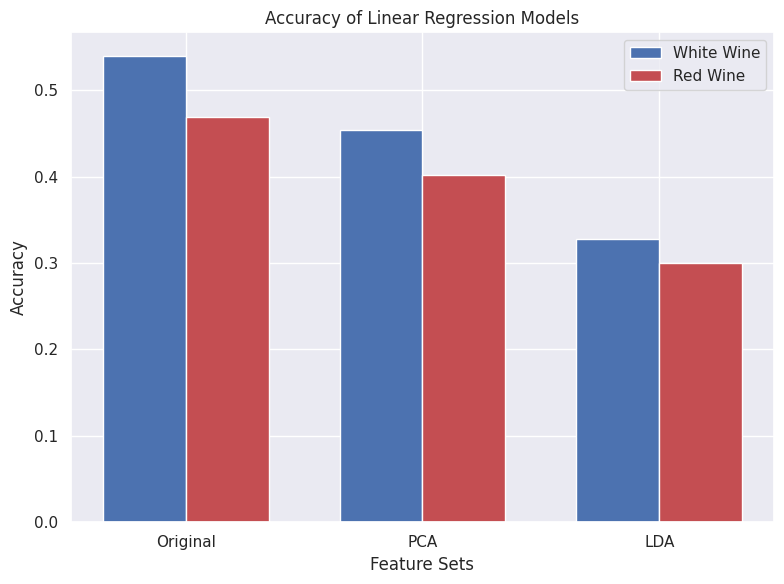

In [85]:

accuracy_white = [accuracy_original_white, accuracy_pca_white, accuracy_lda_white]
accuracy_red = [accuracy_original_red, accuracy_pca_red, accuracy_lda_red]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = [1, 2, 3]

plt.bar(index, accuracy_white, bar_width, label='White Wine', color='b')
plt.bar([i + bar_width for i in index], accuracy_red, bar_width, label='Red Wine', color='r')

plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy of Linear Regression Models')
plt.xticks([i + bar_width/2 for i in index], ['Original', 'PCA', 'LDA'])
plt.legend()
plt.tight_layout()
plt.show()


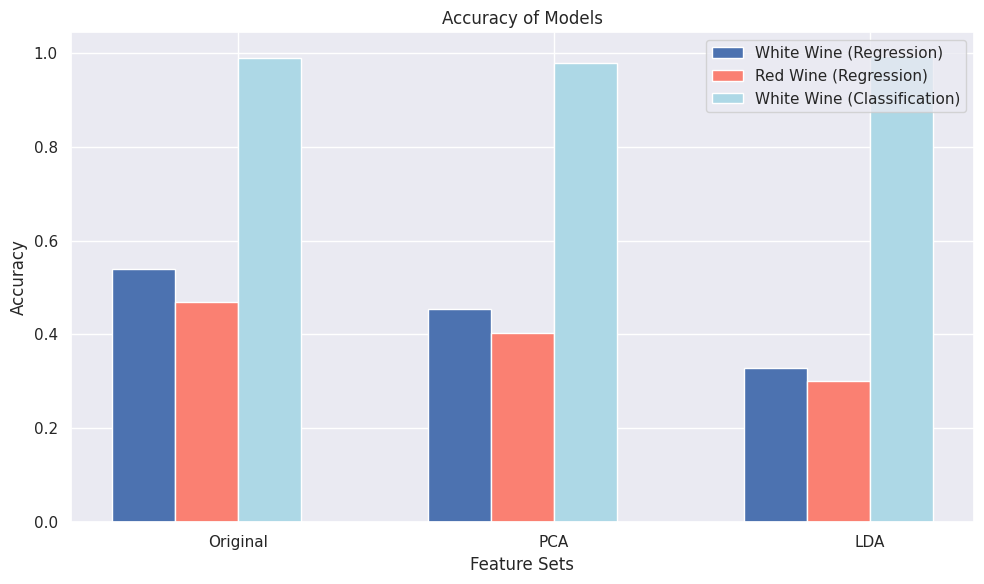

In [86]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_white_regression = [accuracy_original_white, accuracy_pca_white, accuracy_lda_white]
accuracy_red_regression = [accuracy_original_red, accuracy_pca_red, accuracy_lda_red]

accuracy_classification = [accuracy_original, accuracy_pca, accuracy_lda]

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(accuracy_white_regression))

plt.bar(index, accuracy_white_regression, bar_width, label='White Wine (Regression)', color='b', align='center')
plt.bar(index + bar_width, accuracy_red_regression, bar_width, label='Red Wine (Regression)', color='salmon', align='center')

plt.bar(index + 2 * bar_width, accuracy_classification, bar_width, label='White Wine (Classification)', color='lightblue', align='center')

plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.xticks(index + 1.5 * bar_width, ['Original', 'PCA', 'LDA'])
plt.legend()
plt.tight_layout()
plt.show()

